In [3]:
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [4]:
train = pd.read_csv("train_sample.csv")
test = pd.read_csv("test_sample.csv")

In [5]:
test

,X1,X2,X3,X4,X5,X6,X7
0,0.504602,0.957332,0.806365,0.449834,0.300049,0.391471,0.421623
1,0.177529,0.907219,0.348762,0.370761,0.964879,0.254687,0.449740
2,0.733998,0.553620,0.398790,0.684209,0.074817,0.668057,0.686537
3,0.869909,0.750484,0.781025,0.258597,0.890811,0.447860,0.714579
4,0.251358,0.024376,0.512262,0.569833,0.164231,0.816778,0.576501
...,...,...,...,...,...,...,...
495,0.722267,0.790971,0.655843,0.709249,0.339865,0.569294,0.028594
496,0.038597,0.106989,0.023633,0.409981,0.990477,0.217959,0.149159
497,0.213161,0.126007,0.478675,0.500225,0.758760,0.820979,0.090324
498,0.543759,0.191368,0.980258,0.294584,0.378884,0.952554,0.015101


In [6]:
y = train["class"]
X = train.drop(columns=["class"])

In [7]:
data_train = xgb.DMatrix(X, label=y)
param = {'objective': 'binary:logistic', 'eval_metric': 'auc'}
xgbmodel = xgb.cv(param, data_train, nfold=5, num_boost_round=100, seed=0)
xgbmodel

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.967080,0.003427,0.874625,0.029429
1,0.984934,0.002996,0.891389,0.033763
2,0.990260,0.003177,0.903528,0.026305
3,0.992941,0.001688,0.908883,0.024943
4,0.995256,0.000843,0.906657,0.026514
...,...,...,...,...
95,1.000000,0.000000,0.920265,0.016210
96,1.000000,0.000000,0.920677,0.016349
97,1.000000,0.000000,0.920209,0.016903
98,1.000000,0.000000,0.920356,0.016520


16
0.9215737108838533


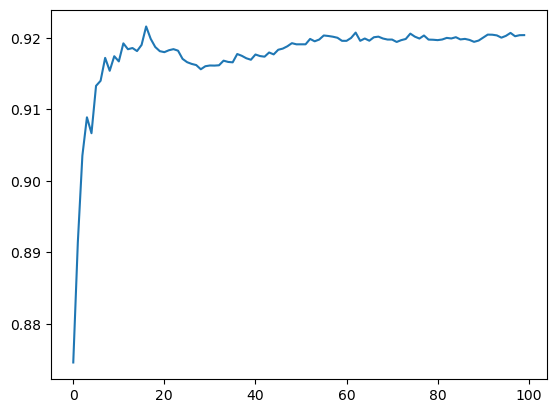

In [8]:
plt.plot(xgbmodel["test-auc-mean"])
num_of_round = np.argmax(xgbmodel["test-auc-mean"])
print(num_of_round)
print(xgbmodel["test-auc-mean"][num_of_round])

In [9]:
model = xgb.train(param, data_train, num_of_round)
prediction = model.predict(xgb.DMatrix(test))

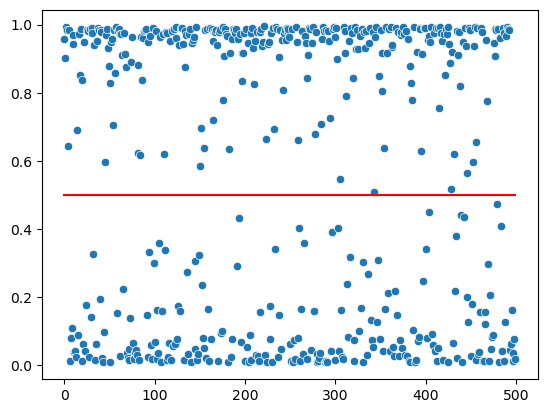

In [10]:
import seaborn as sns
sns.scatterplot(prediction)
plt.plot([0.5]*len(prediction), color="red")

In [13]:
model = RandomForestClassifier(random_state=0)
model.fit(X, y)
model.feature_importances_

array([0.08655624, 0.07628877, 0.09031766, 0.07567425, 0.07684018,
       0.06741178, 0.52691111])

In [15]:
rf_most_important = np.argmax(model.feature_importances_)+1
rf_most_important

np.int64(7)

In [16]:
np.savez('submission.npz', rf_most_important=rf_most_important, 
         prediction=prediction)

In [17]:
npzfile = np.load('submission.npz')
print(npzfile['rf_most_important'],npzfile['prediction'].shape)

7 (500,)
